<a href="https://colab.research.google.com/github/PrasannaMadiwar/kaggle_competitions/blob/main/kaggle__completition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


### Feature Extraction

In [ ]:
df[['Group','PasengerNo']]  = df['PassengerId'].str.split('_',expand=True)
df['Group'] = pd.to_numeric(df['Group'],errors='coerce')
df['PasengerNo'] = pd.to_numeric(df['PasengerNo'],errors='coerce')

In [ ]:
df[['deck','deck_num','side']] = df['Cabin'].str.split('/',expand=True)
df['deck_num'] = pd.to_numeric(df['deck_num'],errors='coerce')

In [ ]:
spending = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df['Spendings'] = df[spending].sum(axis=1).astype(int)

In [ ]:
df.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [ ]:
gg = df['Group'].value_counts()
df['Group_members'] = df['Group'].map(gg)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     8492 non-null   object 
 1   CryoSleep      8476 non-null   object 
 2   Destination    8511 non-null   object 
 3   Age            8514 non-null   float64
 4   VIP            8490 non-null   object 
 5   RoomService    8512 non-null   float64
 6   FoodCourt      8510 non-null   float64
 7   ShoppingMall   8485 non-null   float64
 8   Spa            8510 non-null   float64
 9   VRDeck         8505 non-null   float64
 10  Transported    8693 non-null   bool   
 11  Group          8693 non-null   int64  
 12  PasengerNo     8693 non-null   int64  
 13  deck           8494 non-null   object 
 14  deck_num       8494 non-null   float64
 15  side           8494 non-null   object 
 16  Spendings      8693 non-null   int64  
 17  Group_members  8693 non-null   int64  
dtypes: bool(

In [ ]:
cat = ['HomePlanet','CryoSleep','Destination','VIP','deck','side']
num = ['Age','Group','PasengerNo','deck_num','Spendings','Group_members','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

## Bivarieate EDA

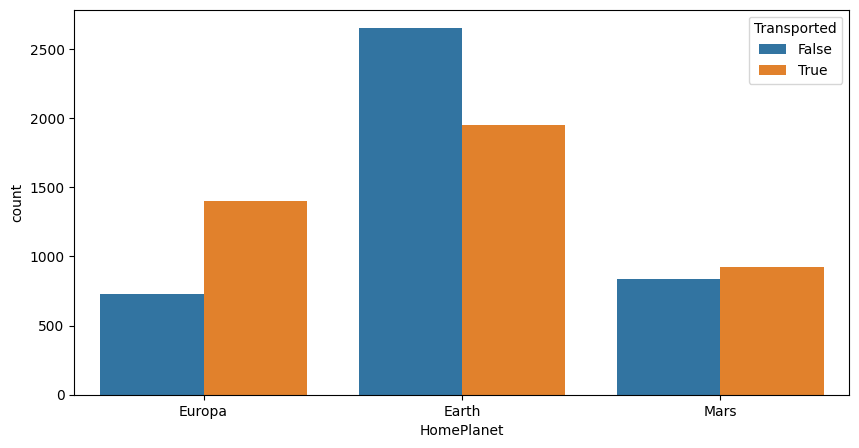

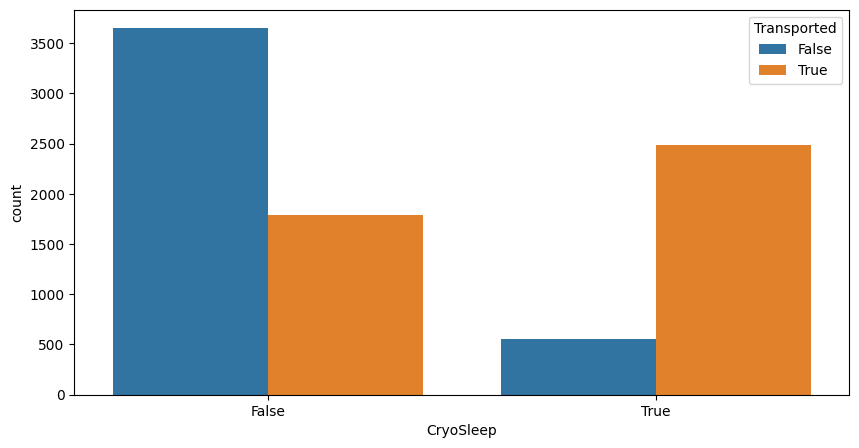

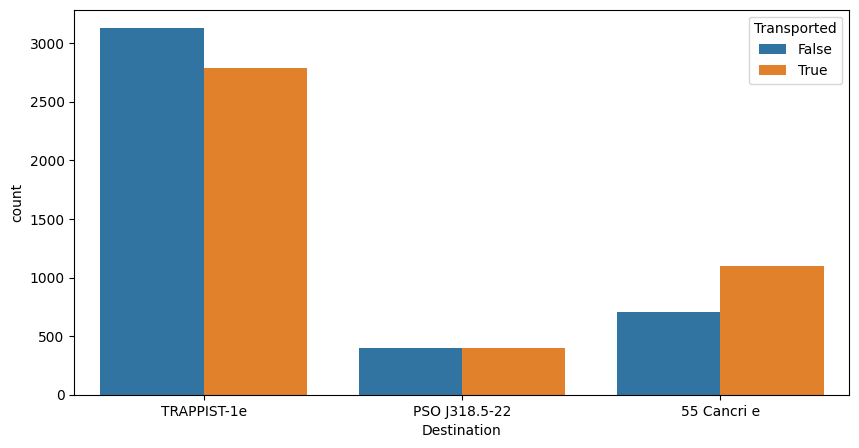

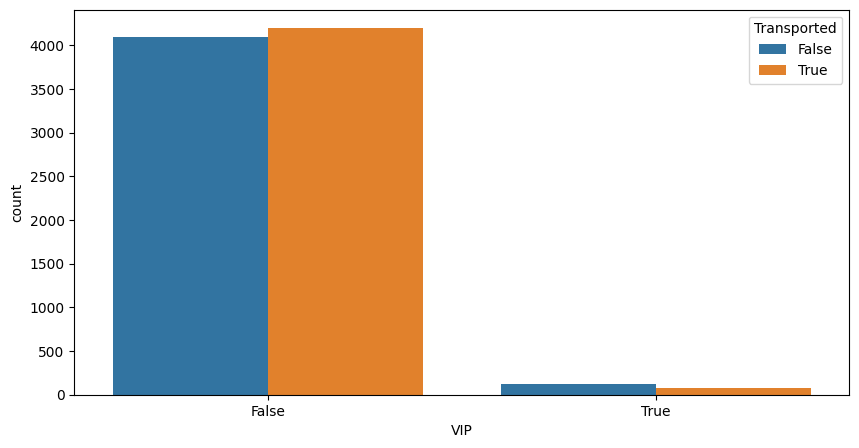

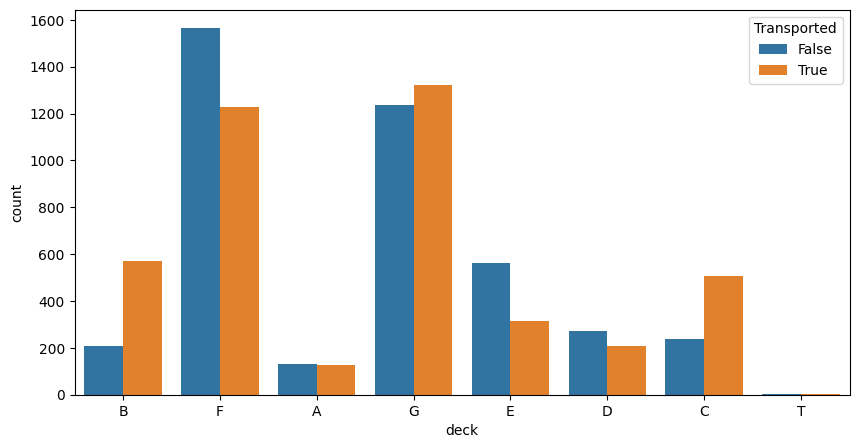

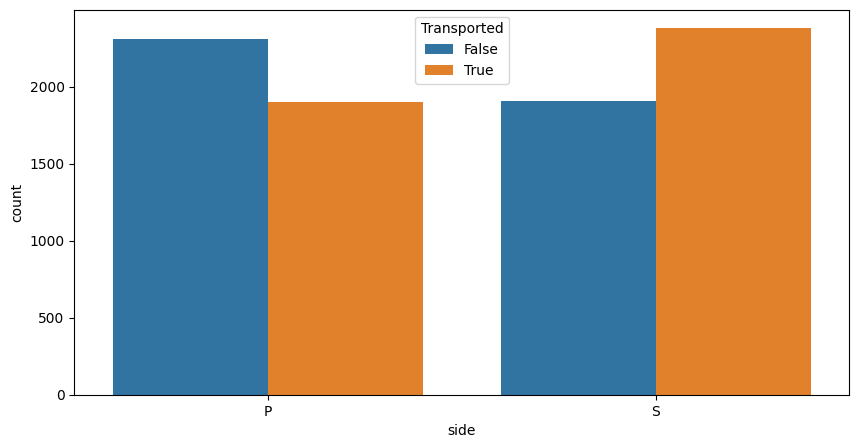

In [ ]:
for col in cat:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df,hue='Transported')
  plt.show()

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


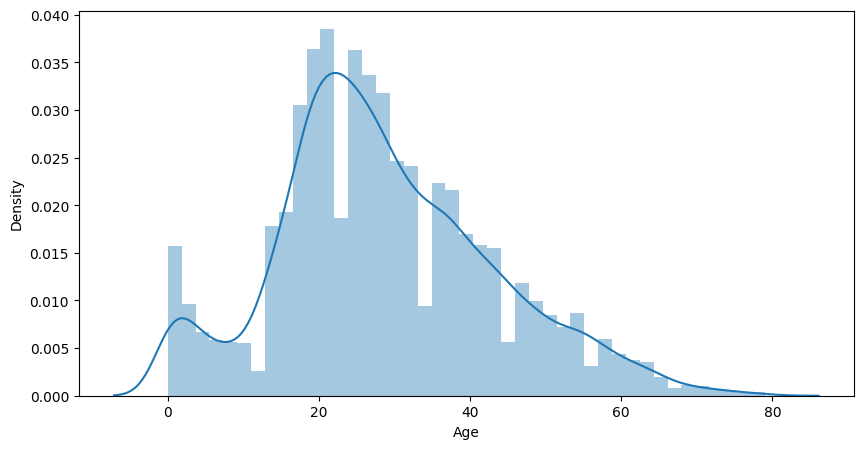

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


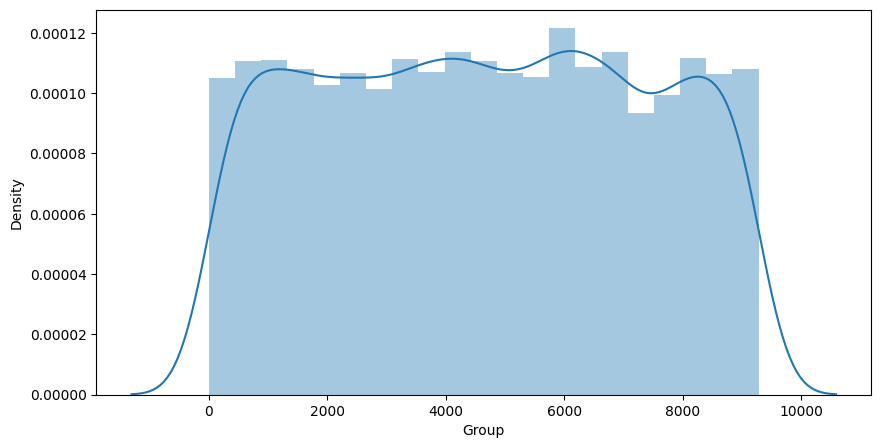

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


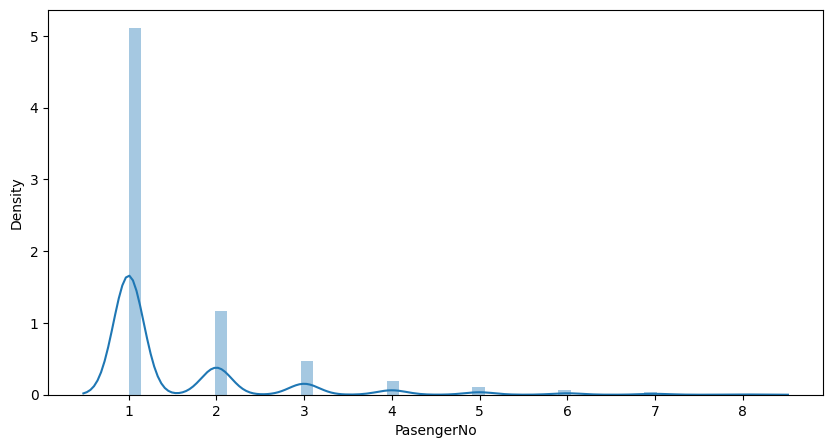

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


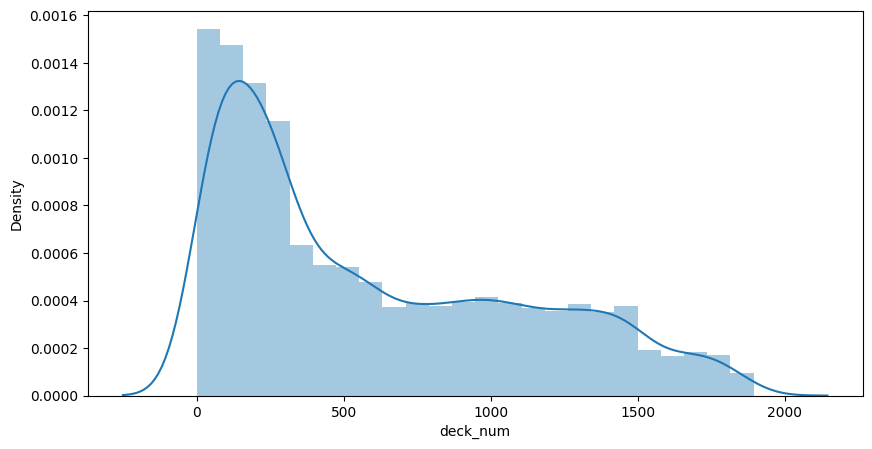

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


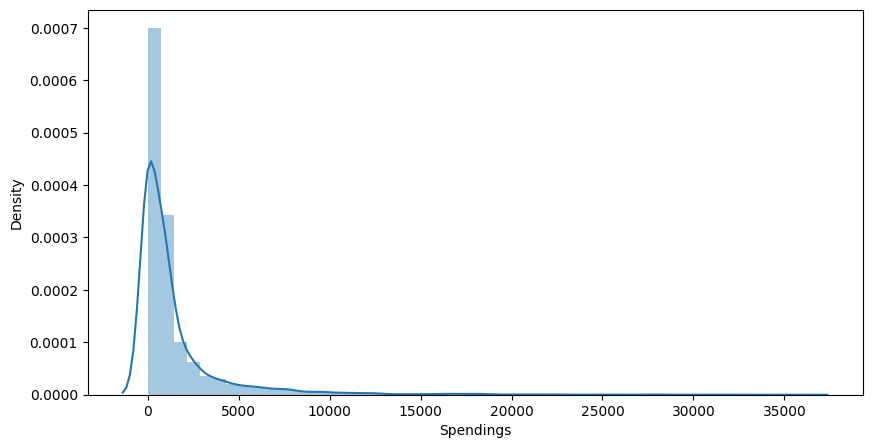

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


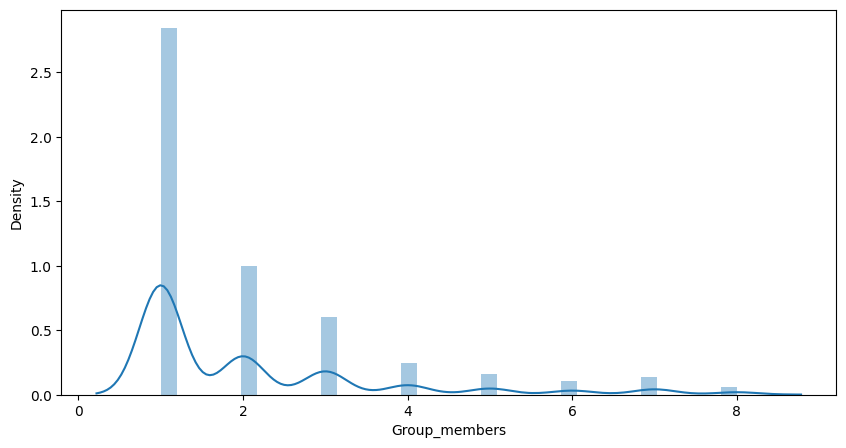

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


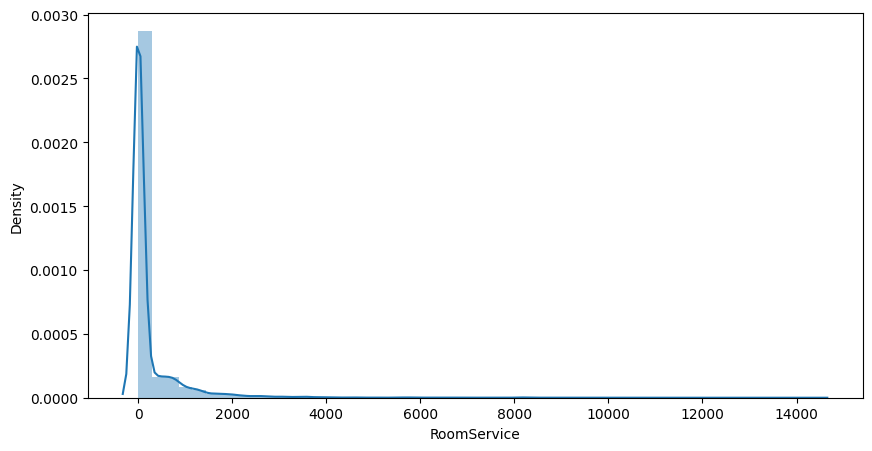

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


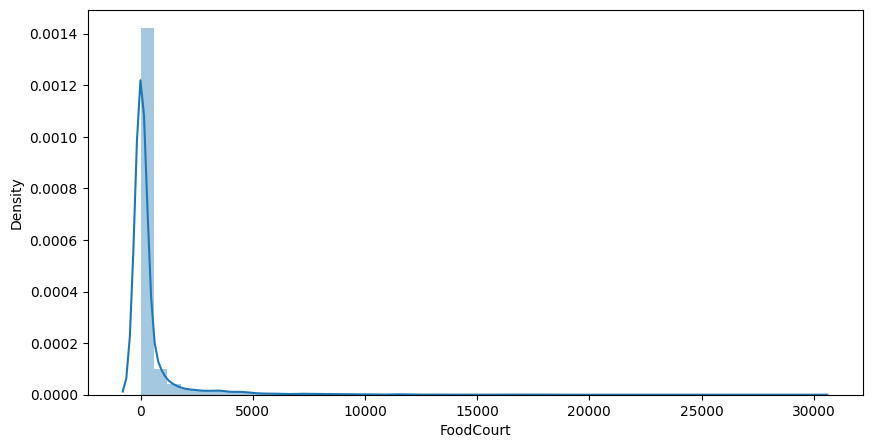

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


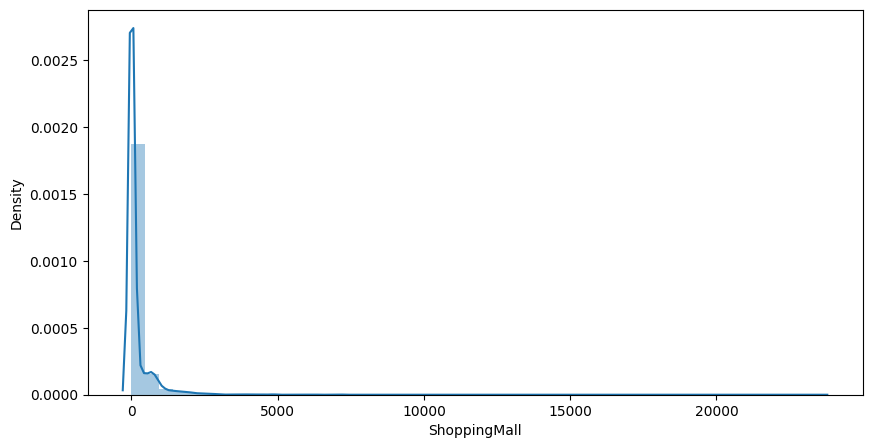

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


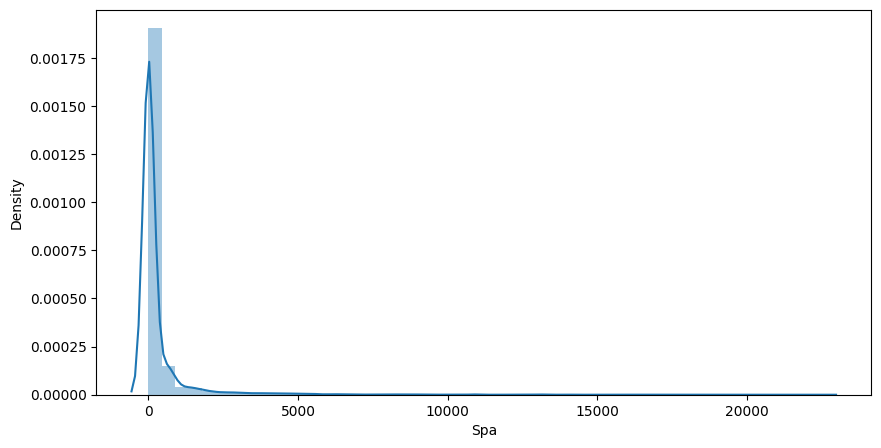

/tmp/ipython-input-14-2023691863.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


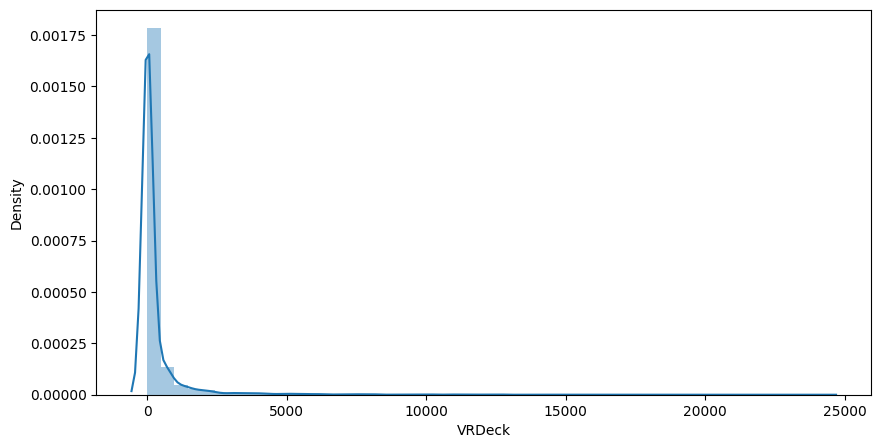

In [ ]:
for col in num :
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.show()

<Axes: xlabel='Group_members', ylabel='count'>

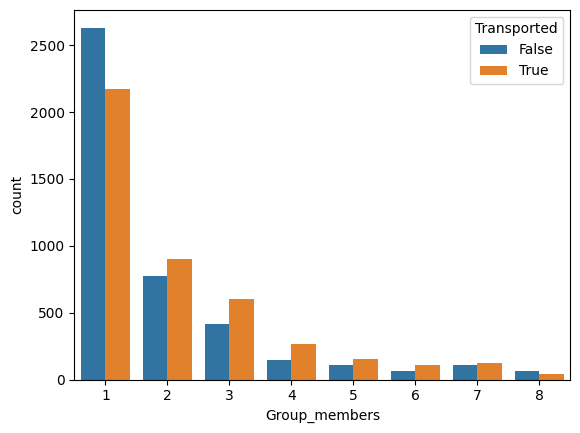

In [ ]:
sns.countplot(data=df,x='Group_members',hue='Transported')

## Outliers Analysis

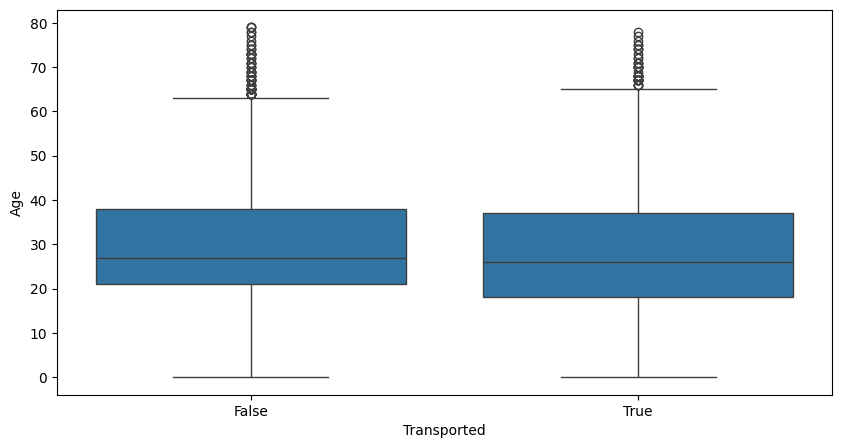

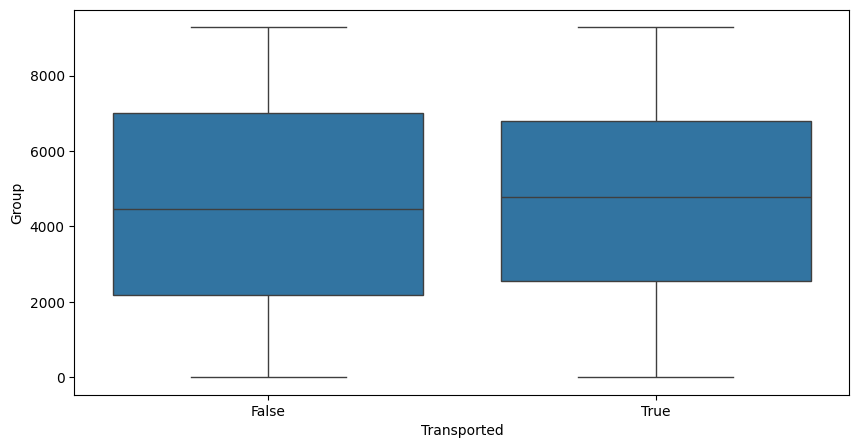

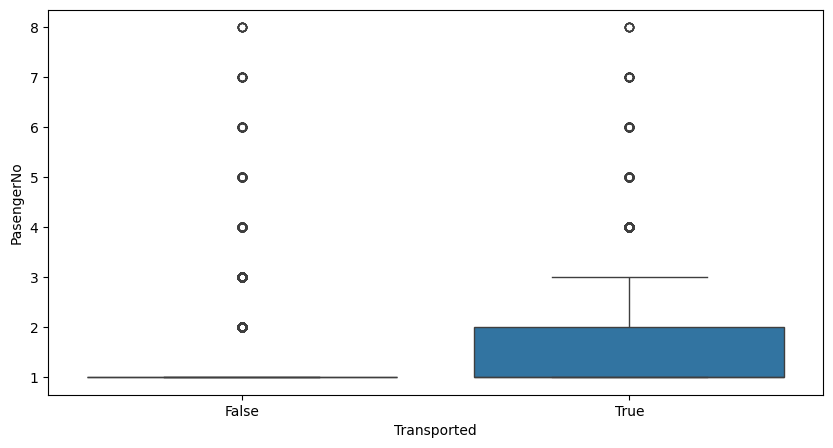

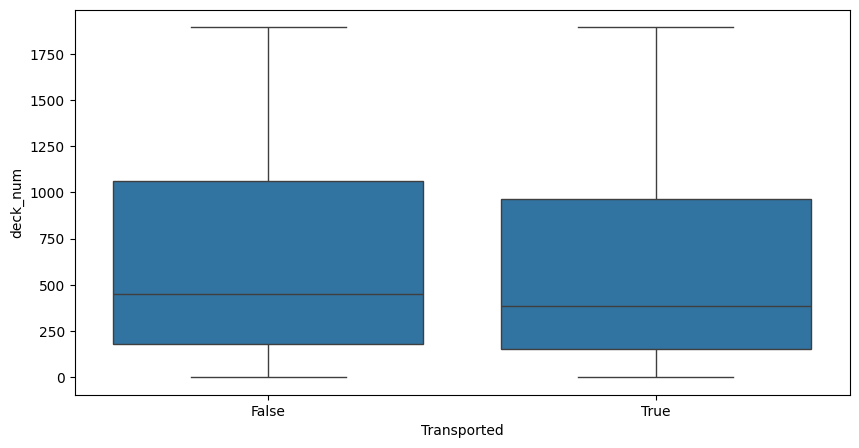

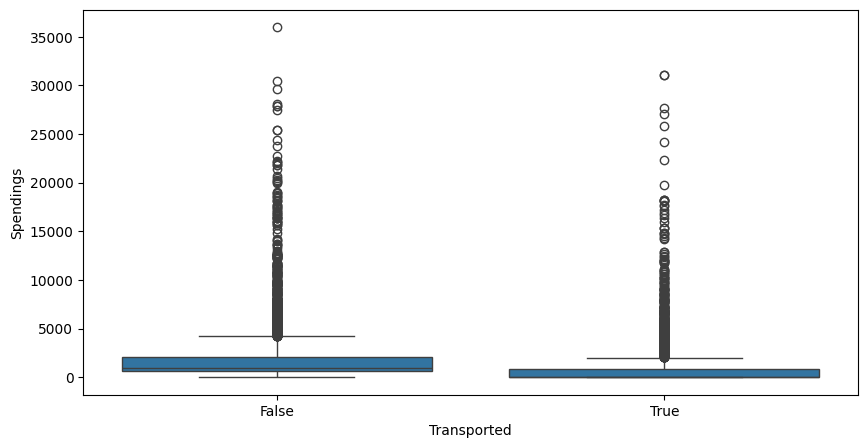

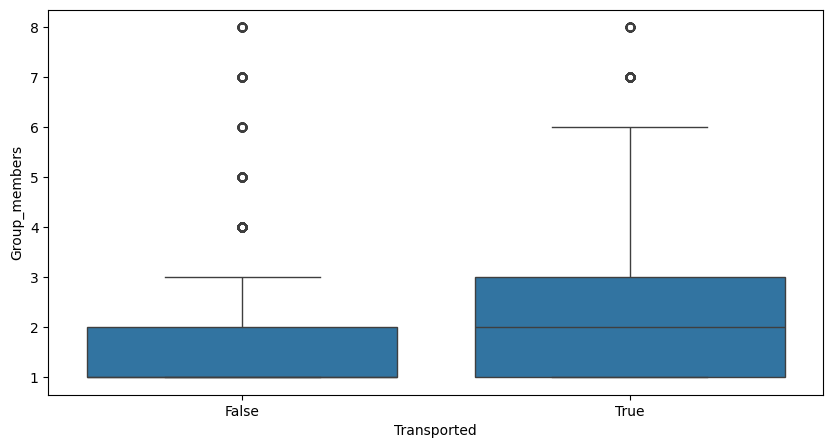

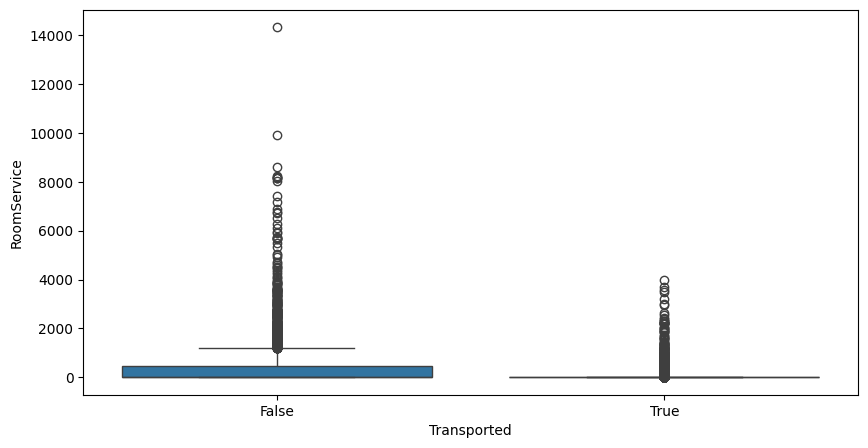

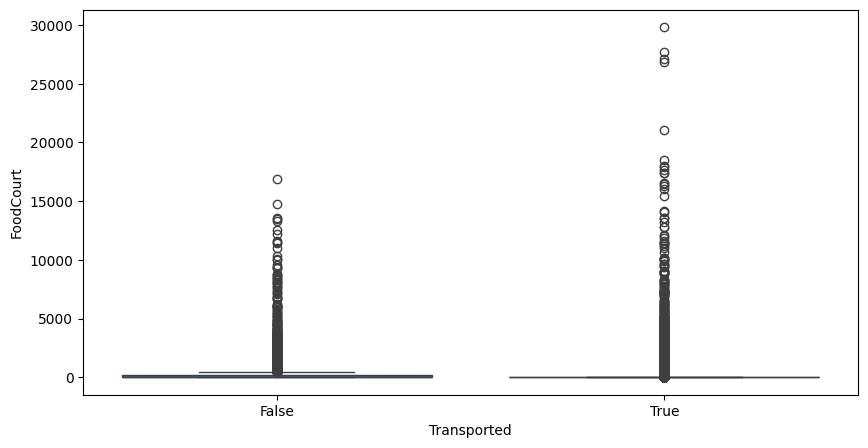

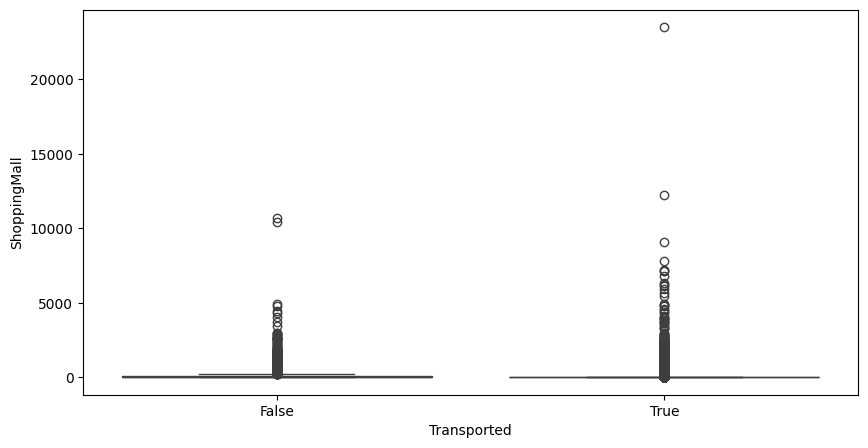

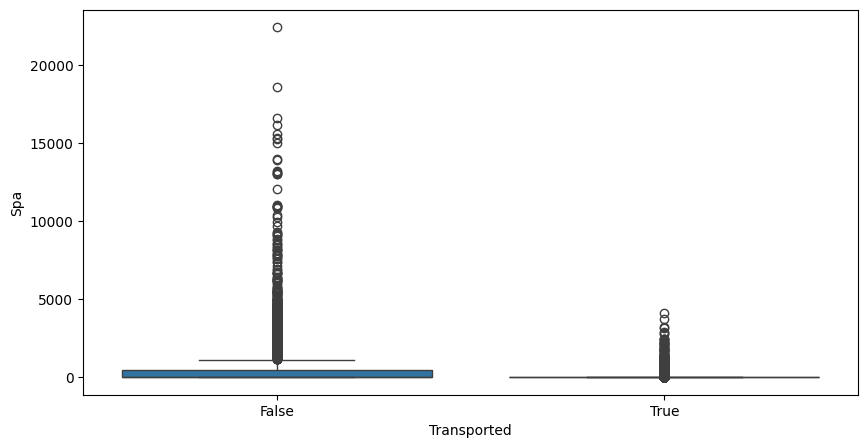

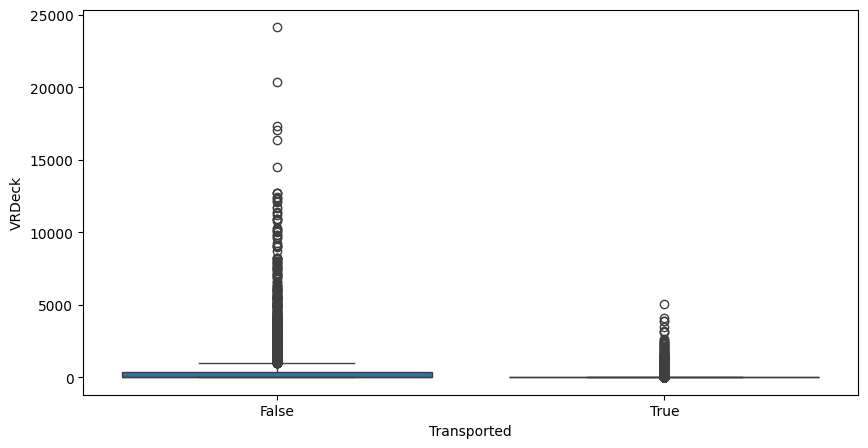

In [ ]:
for col in num:
  plt.figure(figsize=(10,5))
  sns.boxplot(y=df[col],x=df['Transported'])
  plt.show()

In [ ]:
df.corr(numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,PasengerNo,deck_num,Spendings,Group_members
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.009439,-0.132756,-0.132255,0.186530,-0.179102
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.000346,-0.022571,-0.008986,0.237998,-0.040777
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.009552,0.023391,-0.183429,0.745105,0.032632
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,0.017397,-0.038812,0.001727,0.222310,-0.038770
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,-0.005211,0.016820,-0.131342,0.596633,0.019223
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.015432,0.010082,-0.139080,0.586299,0.009401
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,0.021491,0.066390,-0.045097,-0.199514,0.082644
Group,-0.009439,-0.000346,-0.009552,0.017397,-0.005211,0.015432,0.021491,1.000000,0.011170,0.679723,0.003012,0.014753
PasengerNo,-0.132756,-0.022571,0.023391,-0.038812,0.016820,0.010082,0.066390,0.011170,1.000000,-0.041735,0.010540,0.757107
deck_num,-0.132255,-0.008986,-0.183429,0.001727,-0.131342,-0.139080,-0.045097,0.679723,-0.041735,1.000000,-0.213494,-0.049381


## Mulivariate EDA

In [ ]:
#sns.pairplot(df,hue='Transported')

In [ ]:
df.isna().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


## Now let Impute  Na values

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['RoomService'].fillna(0,inplace=True)
df['FoodCourt'].fillna(0,inplace=True)
df['ShoppingMall'].fillna(0,inplace=True)
df['Spa'].fillna(0,inplace=True)
df['VRDeck'].fillna(0,inplace=True)


/tmp/ipython-input-20-407161080.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-20-407161080.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
df.loc[(df['HomePlanet'].isna()) & (df['Transported']==True),'HomePlanet'] = 'Europa'
df.loc[(df['HomePlanet'].isna()) & (df['Transported']==False),'HomePlanet'] = 'Earth'

In [ ]:
df.loc[(df['CryoSleep'].isna()) &( df['Transported']==True) ,'CryoSleep'] = True
df.loc[(df['CryoSleep'].isna()) & (df['Transported']==False),'CryoSleep'] = False

In [ ]:
df.loc[(df['Destination'].isna()) & (df['Transported']==True),'Destination'] = '55 Cancri e'
df.loc[(df['Destination'].isna()) & (df['Transported']==False),'Destination'] = 'TRAPPIST-1e'

In [ ]:
df.loc[(df['VIP'].isna()) & (df['Transported']==True),'VIP'] = False
df.loc[(df['VIP'].isna()) & (df['Transported']==False) & (df['Spendings']!= 0),'VIP'] = True
df.loc[(df['VIP'].isna()) & (df['Transported']==False) & (df['Spendings']== 0),'VIP'] = False

In [ ]:
df.loc[(df['deck'].isna()) & (df['Transported']==True),'deck'] = 'G'
df.loc[(df['deck'].isna()) & (df['Transported']==False),'deck'] = 'F'
df.loc[(df['side'].isna()) & (df['Transported']==True),'side'] = 'S'
df.loc[(df['side'].isna()) & (df['Transported']==False),'side'] = 'P'
df.loc[(df['deck_num'].isna()),'deck_num'] = 82

In [ ]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Group'] = df['Group'].astype(int)
df['PasengerNo'] = df['PasengerNo'].astype(int)
df['deck_num'] = df['deck_num'].astype(int)
df['RoomService'] = df['RoomService'].astype(int)
df['FoodCourt'] = df['FoodCourt'].astype(int)
df['ShoppingMall'] = df['ShoppingMall'].astype(int)
df['Spa'] = df['Spa'].astype(int)
df['VRDeck'] = df['VRDeck'].astype(int)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CryoSleep      8693 non-null   int64 
 1   Age            8693 non-null   int64 
 2   VIP            8693 non-null   int64 
 3   RoomService    8693 non-null   int64 
 4   FoodCourt      8693 non-null   int64 
 5   ShoppingMall   8693 non-null   int64 
 6   Spa            8693 non-null   int64 
 7   VRDeck         8693 non-null   int64 
 8   Transported    8693 non-null   bool  
 9   Group          8693 non-null   int64 
 10  PasengerNo     8693 non-null   int64 
 11  deck           8693 non-null   object
 12  deck_num       8693 non-null   int64 
 13  side           8693 non-null   object
 14  Spendings      8693 non-null   int64 
 15  Group_members  8693 non-null   int64 
 16  Europa         8693 non-null   bool  
 17  Mars           8693 non-null   bool  
 18  PSO J318.5-22  8693 non-null

In [ ]:
home = pd.get_dummies(df['HomePlanet'],drop_first=True)
destination = pd.get_dummies(df['Destination'],drop_first=True)

In [ ]:
Data = pd.concat([df,home,destination],axis=1)

In [ ]:
Data.drop(['HomePlanet','Destination'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe1 = OrdinalEncoder(categories=[['F','G','E','B','C','D','A','T']])
Data['deck'] = oe1.fit_transform(Data[['deck']])
Data['deck'] = Data['deck'].astype(int)

In [ ]:
oe2 = OrdinalEncoder(categories=[['P','S']])
Data['side'] = oe2.fit_transform(Data[['side']])
Data['side'] = Data['side'].astype(int)

In [ ]:
Data.shape

(8693, 20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Data.drop('Transported',axis=1),Data['Transported'],test_size=0.2,random_state=42)

In [ ]:
rf = RandomForestClassifier(
    oob_score=True,
    n_estimators=500,
    min_samples_split=15,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_samples=0.8,
    max_features='sqrt',
    max_depth=None,
    criterion='gini',
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.8, min_samples_split=15, n_estimators=500,
                       oob_score=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8073605520414031

In [ ]:
rf.oob_score_

0.813057233247052

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
params = {

          'n_estimators' : [100,200,300,400,500,600],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10,15,20],
          'min_impurity_decrease' : [0.0,0.1,0.2,0.3,0.4],
          'max_features' : ['auto','sqrt','log2'],
          'bootstrap': [True,False],
          'criterion' : ['gini','entropy'],
          'max_samples' : [0.5,0.8,1.0],
          'oob_score' : [True,False],
          'max_leaf_nodes': [2,3,4,6,8,10,12,15]
          }

In [ ]:
clf = RandomForestClassifier()

In [ ]:
rsc = RandomizedSearchCV(clf,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)

In [ ]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
350 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 15, 25, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.5, 0.8, 1.0],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600],
                                        'oob_score': [True, False]},
                   verbose=2)

In [ ]:
rsc.best_score_
rsc.best_params_

{'oob_score': False,
 'n_estimators': 500,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': 0.8,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adc = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adc.fit(X_train,y_train)


AdaBoostClassifier(random_state=42)

In [ ]:
accuracy_score(y_test,adc.predict(X_test))

0.7676825761932144

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
accuracy_score(y_test,gbc.predict(X_test))

0.7998849913743531

In [ ]:
para = {'n_estimators': [100, 200, 300, 500,600],
        'learning_rate': [0.01, 0.05, 0.1, 0.2,0.3],
        'max_depth': [3, 4, 5, 6, 8,10],
        'min_samples_split': [2, 5, 10, 15,20],
        'min_samples_leaf': [1, 2, 4, 6,8,10],
        'max_features': ['sqrt', 'log2', None],
        'subsample': [0.6, 0.8, 1.0],
        'min_impurity_decrease' : [0.0,0.1,0.2,0.3,0.4],
        'max_leaf_nodes': [2,3,4,6,8,10,12,15],
}



In [ ]:
rvc1 = RandomizedSearchCV(gbc,param_distributions=para,n_iter=100,cv=5,verbose=2,n_jobs=-1)

In [ ]:
rvc1.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [2, 3, 4, 6, 8, 10,
                                                           12, 15],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         600],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=2)

In [ ]:
rvc1.best_score_
best_gbc = rvc1.best_estimator_

In [ ]:
df1 = pd.read_csv('/content/train.csv')
sub = pd.read_csv('/content/train.csv')

In [ ]:
df1[['Group','PasengerNo']]  = df1['PassengerId'].str.split('_',expand=True)
df1['Group'] = pd.to_numeric(df1['Group'],errors='coerce')
df1['PasengerNo'] = pd.to_numeric(df1['PasengerNo'],errors='coerce')

In [ ]:
df1[['deck','deck_num','side']] = df1['Cabin'].str.split('/',expand=True)
df1['deck_num'] = pd.to_numeric(df1['deck_num'],errors='coerce')
spending = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df1['Spendings'] = df1[spending].sum(axis=1).astype(int)
df1.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [ ]:
gg1 = df1['Group'].value_counts()
df1['Group_members'] = df1['Group'].map(gg1)

In [ ]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1['RoomService'].fillna(0,inplace=True)
df1['FoodCourt'].fillna(0,inplace=True)
df1['ShoppingMall'].fillna(0,inplace=True)
df1['Spa'].fillna(0,inplace=True)
df1['VRDeck'].fillna(0,inplace=True)
df1['CryoSleep'].fillna(False,inplace=True)
df1['HomePlanet'].fillna('Earth',inplace=True)
df1['Destination'].fillna('TRAPPIST-1e',inplace=True)
df1['VIP'].fillna(False,inplace=True)
df1['deck'].fillna('F',inplace=True)
df1['side'].fillna('S',inplace=True)
df1['deck_num'].fillna(4,inplace=True)


/tmp/ipython-input-182-3734920995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)
/tmp/ipython-input-182-3734920995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
df1['CryoSleep'] = df1['CryoSleep'].astype(int)
df1['VIP'] = df1['VIP'].astype(int)
df1['Age'] = df1['Age'].astype(int)
df1['Group'] = df1['Group'].astype(int)
df1['PasengerNo'] = df1['PasengerNo'].astype(int)
df1['deck_num'] = df1['deck_num'].astype(int)
df1['RoomService'] = df1['RoomService'].astype(int)
df1['FoodCourt'] = df1['FoodCourt'].astype(int)
df1['ShoppingMall'] = df1['ShoppingMall'].astype(int)
df1['Spa'] = df1['Spa'].astype(int)
df1['VRDeck'] = df1['VRDeck'].astype(int)

In [ ]:
home1 = pd.get_dummies(df1['HomePlanet'],drop_first=True)
destination1 = pd.get_dummies(df1['Destination'],drop_first=True)
test = pd.concat([df1,home1,destination1],axis=1)
test.drop(['HomePlanet','Destination'],axis=1,inplace=True)

In [ ]:
oe11 = OrdinalEncoder(categories=[['F','G','E','B','C','D','A','T']])
test['deck'] = oe11.fit_transform(test[['deck']])
test['deck'] = test['deck'].astype(int)
oe21 = OrdinalEncoder(categories=[['P','S']])
test['side'] = oe21.fit_transform(test[['side']])
test['side'] = test['side'].astype(int)

In [ ]:
pred = best_gbc.predict(test)
submission = pd.DataFrame()
submission['PassengerId'] = sub['PassengerId']
submission['Transported'] = pred

In [ ]:
submission.to_csv('Submission4.csv',index=False)